In [160]:
import pandas as pd
from pandas.api.types import CategoricalDtype
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import preprocessing

In [161]:
# Grabbing data from the csv file and telling Pandas that the data already contains an index column.
cd = pd.read_csv("C:/Users/cklni/Desktop/WGU/D208/churn_clean.csv", index_col= [0])

In [162]:
# checking for columns with null values, as I know that each column should have 10,000 non null
cd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer_id           10000 non-null  object 
 1   Interaction           10000 non-null  object 
 2   UID                   10000 non-null  object 
 3   City                  10000 non-null  object 
 4   State                 10000 non-null  object 
 5   County                10000 non-null  object 
 6   Zip                   10000 non-null  int64  
 7   Lat                   10000 non-null  float64
 8   Lng                   10000 non-null  float64
 9   Population            10000 non-null  int64  
 10  Area                  10000 non-null  object 
 11  TimeZone              10000 non-null  object 
 12  Job                   10000 non-null  object 
 13  Children              10000 non-null  int64  
 14  Age                   10000 non-null  int64  
 15  Income             

In [163]:
#Checking Children for outliers
cd.Children.describe()

count    10000.0000
mean         2.0877
std          2.1472
min          0.0000
25%          0.0000
50%          1.0000
75%          3.0000
max         10.0000
Name: Children, dtype: float64

In [164]:
#Checking Age for outliers
cd.Age.describe()

count    10000.000000
mean        53.078400
std         20.698882
min         18.000000
25%         35.000000
50%         53.000000
75%         71.000000
max         89.000000
Name: Age, dtype: float64

In [165]:
#Checking Income for outliers
cd.Income.describe()

count     10000.000000
mean      39806.926771
std       28199.916702
min         348.670000
25%       19224.717500
50%       33170.605000
75%       53246.170000
max      258900.700000
Name: Income, dtype: float64

In [166]:
#Checking Bandwidth_GB_Year for outliers
cd.Bandwidth_GB_Year.describe()

count    10000.000000
mean      3392.341550
std       2185.294852
min        155.506715
25%       1236.470827
50%       3279.536903
75%       5586.141370
max       7158.981530
Name: Bandwidth_GB_Year, dtype: float64

In [167]:
#Checking MonthlyCharge for outliers
cd.MonthlyCharge.describe()

count    10000.000000
mean       172.624816
std         42.943094
min         79.978860
25%        139.979239
50%        167.484700
75%        200.734725
max        290.160419
Name: MonthlyCharge, dtype: float64

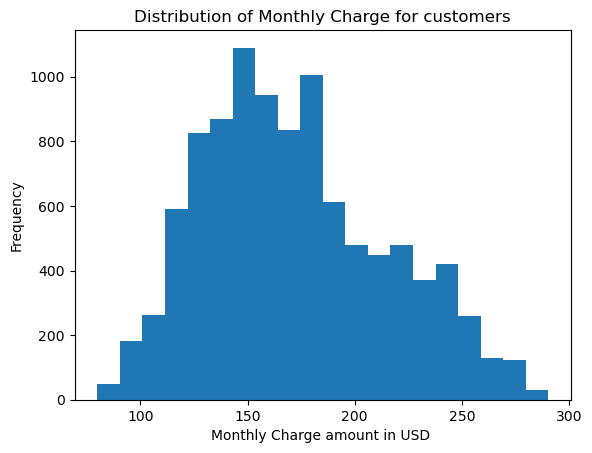

In [168]:
#Visual univariate exploration of MonthlyCharge variable
plt.title('Distribution of Monthly Charge for customers')
plt.hist(data=cd, x="MonthlyCharge", bins = 20)
plt.xlabel('Monthly Charge amount in USD ')
plt.ylabel("Frequency");

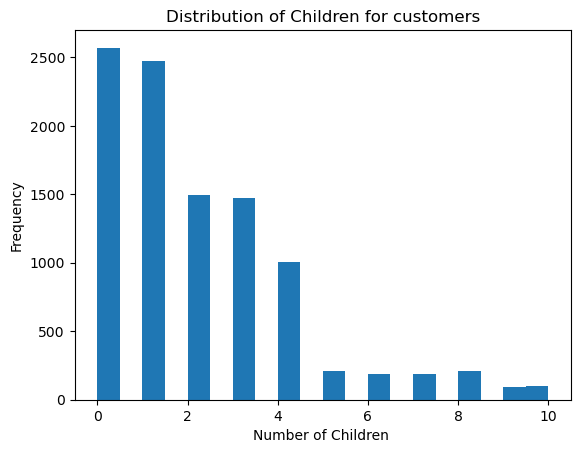

In [169]:
#Visual univariate exploration of Children variable
plt.title('Distribution of Children for customers')
plt.hist(data=cd, x="Children", bins = 20)
plt.xlabel('Number of Children ')
plt.ylabel("Frequency");

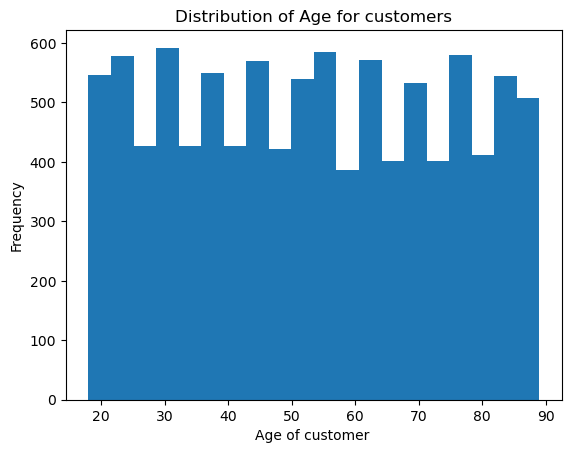

In [170]:
#Visual univariate exploration of Age variable
plt.title('Distribution of Age for customers')
plt.hist(data=cd, x="Age", bins = 20)
plt.xlabel('Age of customer ')
plt.ylabel("Frequency");

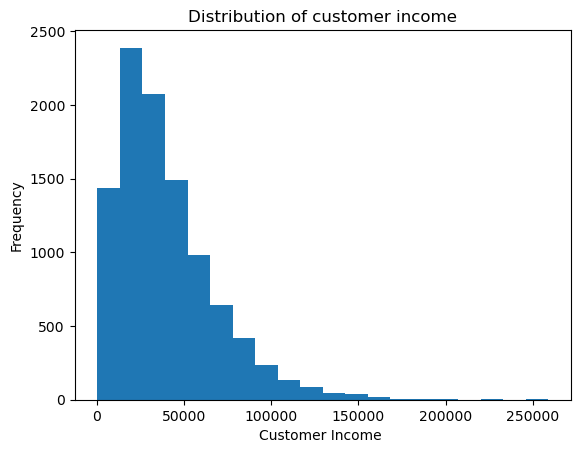

In [171]:
#Visual univariate exploration of Income variable
plt.title('Distribution of customer income')
plt.hist(data=cd, x="Income", bins = 20)
plt.xlabel('Customer Income ')
plt.ylabel("Frequency");

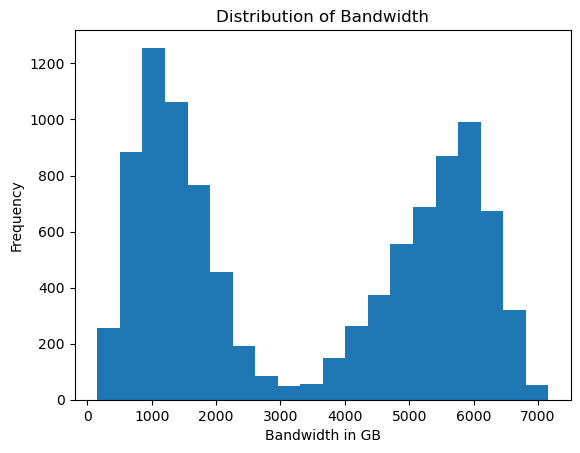

In [172]:
#Visual univariate exploration of Bandwidth_GB_Year variable
plt.title('Distribution of Bandwidth')
plt.hist(data=cd, x="Bandwidth_GB_Year", bins = 20)
plt.xlabel('Bandwidth in GB')
plt.ylabel("Frequency");

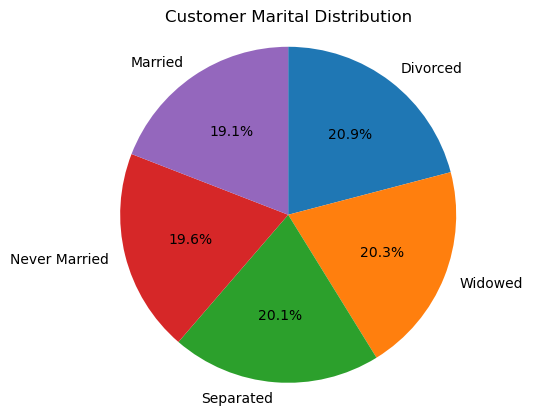

In [173]:
#Univariate exploration of Marital variable
plt.title("Customer Marital Distribution")
contract_counts = cd["Marital"].value_counts()
plt.pie(contract_counts, labels=contract_counts.index, autopct='%1.1f%%', startangle=90, counterclock = False)
plt.axis('square');

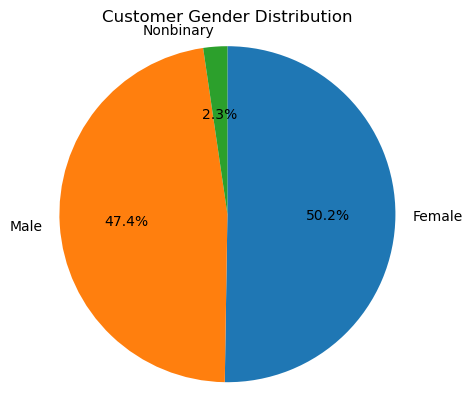

In [174]:
#Univariate exploration of Gender variable
plt.title("Customer Gender Distribution")
contract_counts = cd["Gender"].value_counts()
plt.pie(contract_counts, labels=contract_counts.index, autopct='%1.1f%%', startangle=90, counterclock = False)
plt.axis('square');

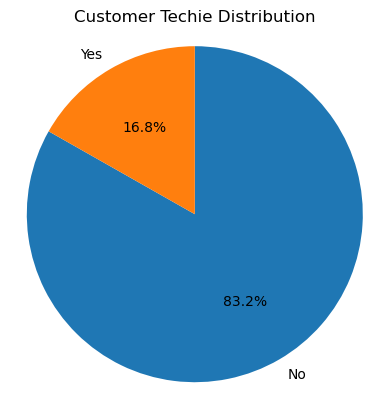

In [175]:
#Univariate exploration of Techie variable
plt.title("Customer Techie Distribution")
contract_counts = cd["Techie"].value_counts()
plt.pie(contract_counts, labels=contract_counts.index, autopct='%1.1f%%', startangle=90, counterclock = False)
plt.axis('square');

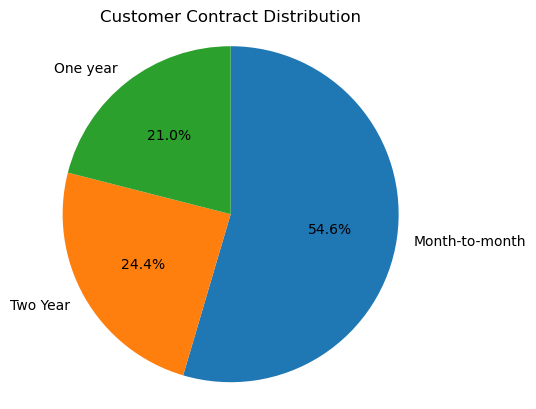

In [176]:
#Univariate exploration of Contract variable
plt.title("Customer Contract Distribution")
contract_counts = cd["Contract"].value_counts()
plt.pie(contract_counts, labels=contract_counts.index, autopct='%1.1f%%', startangle=90, counterclock = False)
plt.axis('square');

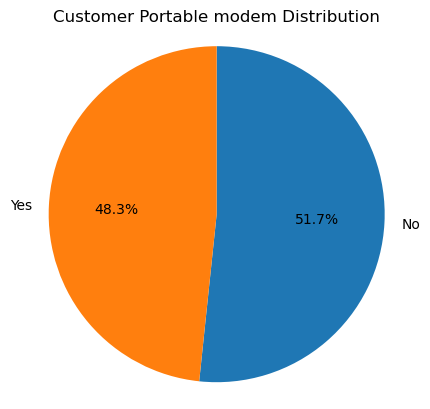

In [177]:
#Univariate exploration of Port_modem variable
plt.title("Customer Portable modem Distribution")
contract_counts = cd["Port_modem"].value_counts()
plt.pie(contract_counts, labels=contract_counts.index, autopct='%1.1f%%', startangle=90, counterclock = False)
plt.axis('square');

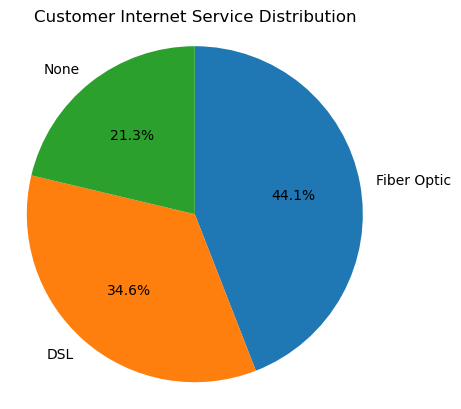

In [178]:
#Univariate exploration of InternetService variable
plt.title("Customer Internet Service Distribution")
contract_counts = cd["InternetService"].value_counts()
plt.pie(contract_counts, labels=contract_counts.index, autopct='%1.1f%%', startangle=90, counterclock = False)
plt.axis('square');

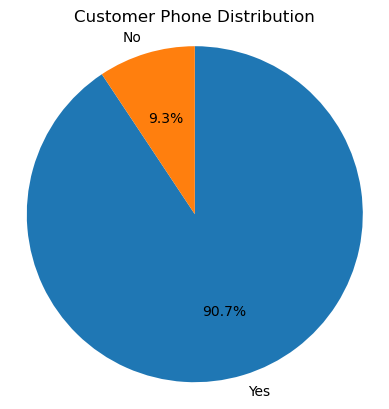

In [179]:
#Univariate exploration of Phone variable
plt.title("Customer Phone Distribution")
contract_counts = cd["Phone"].value_counts()
plt.pie(contract_counts, labels=contract_counts.index, autopct='%1.1f%%', startangle=90, counterclock = False)
plt.axis('square');

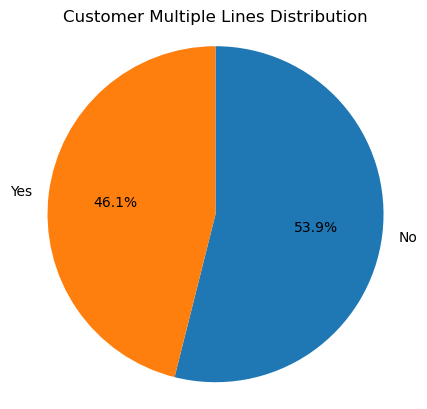

In [180]:
#Univariate exploration of Multiple variable
plt.title("Customer Multiple Lines Distribution")
contract_counts = cd["Multiple"].value_counts()
plt.pie(contract_counts, labels=contract_counts.index, autopct='%1.1f%%', startangle=90, counterclock = False)
plt.axis('square');

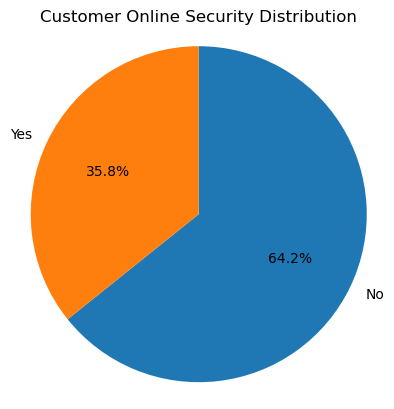

In [181]:
#Univariate exploration of OnlineSecurity variable
plt.title("Customer Online Security Distribution")
contract_counts = cd["OnlineSecurity"].value_counts()
plt.pie(contract_counts, labels=contract_counts.index, autopct='%1.1f%%', startangle=90, counterclock = False)
plt.axis('square');

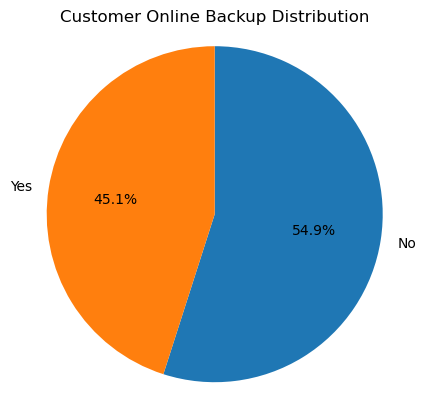

In [182]:
#Univariate exploration of OnlineBackup variable
plt.title("Customer Online Backup Distribution")
contract_counts = cd["OnlineBackup"].value_counts()
plt.pie(contract_counts, labels=contract_counts.index, autopct='%1.1f%%', startangle=90, counterclock = False)
plt.axis('square');

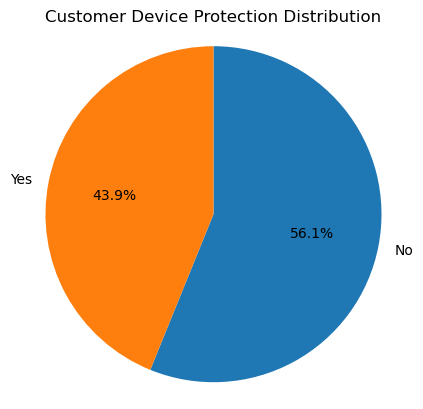

In [183]:
#Univariate exploration of DeviceProtection variable
plt.title("Customer Device Protection Distribution")
contract_counts = cd["DeviceProtection"].value_counts()
plt.pie(contract_counts, labels=contract_counts.index, autopct='%1.1f%%', startangle=90, counterclock = False)
plt.axis('square');

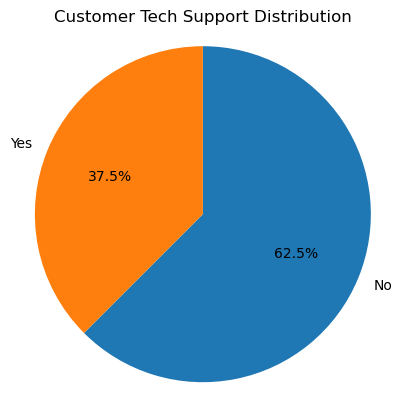

In [184]:
#Univariate exploration of TechSupport variable
plt.title("Customer Tech Support Distribution")
contract_counts = cd["TechSupport"].value_counts()
plt.pie(contract_counts, labels=contract_counts.index, autopct='%1.1f%%', startangle=90, counterclock = False)
plt.axis('square');

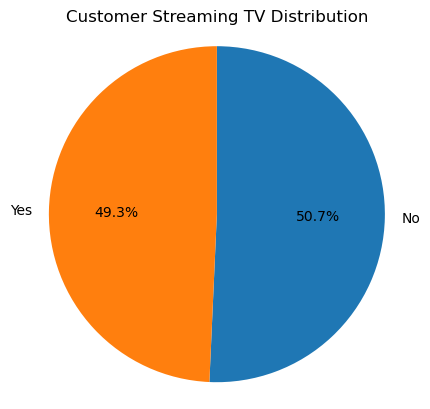

In [185]:
#Univariate exploration of StreamingTV variable
plt.title("Customer Streaming TV Distribution")
contract_counts = cd["StreamingTV"].value_counts()
plt.pie(contract_counts, labels=contract_counts.index, autopct='%1.1f%%', startangle=90, counterclock = False)
plt.axis('square');

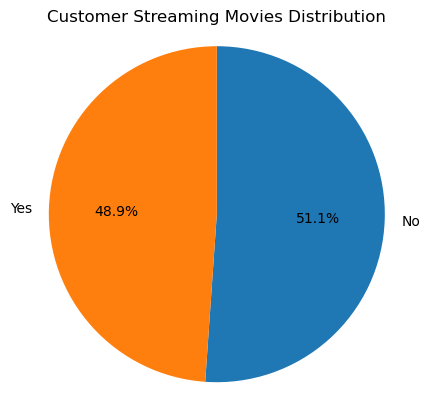

In [186]:
#Univariate exploration of StreamingMovies variable
plt.title("Customer Streaming Movies Distribution")
contract_counts = cd["StreamingMovies"].value_counts()
plt.pie(contract_counts, labels=contract_counts.index, autopct='%1.1f%%', startangle=90, counterclock = False)
plt.axis('square');

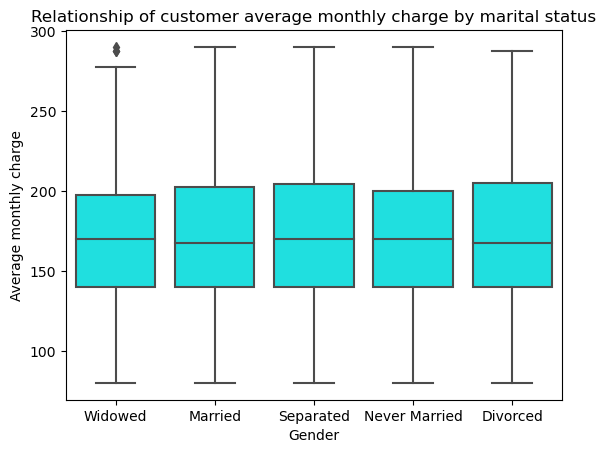

In [187]:
#Visual bivariate exploration of MonthlyCharge variable by each Marital variable
plt.title("Relationship of customer average monthly charge by marital status")
sns.boxplot(data=cd, x= "Marital", y = "MonthlyCharge", color= "cyan")
plt.xlabel("Gender")
plt.ylabel("Average monthly charge");

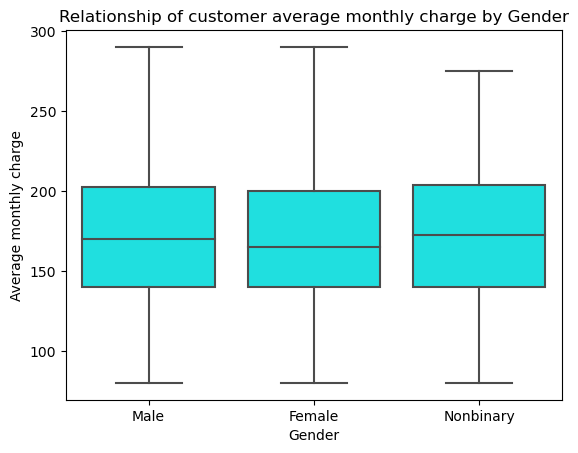

In [188]:
#Visual bivariate exploration of MonthlyCharge variable by each Gender variable
plt.title("Relationship of customer average monthly charge by Gender")
sns.boxplot(data=cd, x= "Gender", y = "MonthlyCharge", color= "cyan")
plt.xlabel("Gender")
plt.ylabel("Average monthly charge");

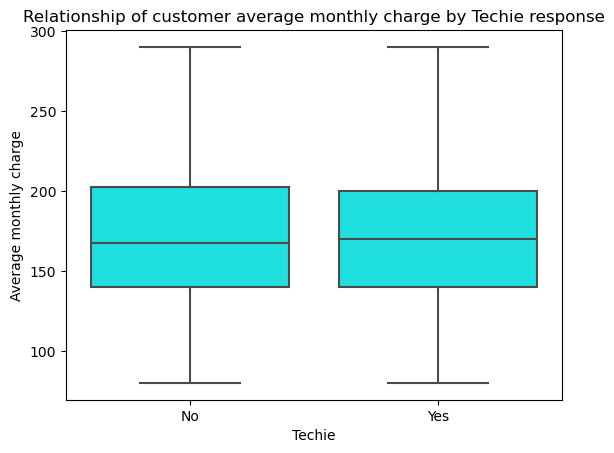

In [189]:
#Visual bivariate exploration of MonthlyCharge variable by each Techie variable
plt.title("Relationship of customer average monthly charge by Techie response")
sns.boxplot(data=cd, x= "Techie", y = "MonthlyCharge", color= "cyan")
plt.xlabel("Techie")
plt.ylabel("Average monthly charge");

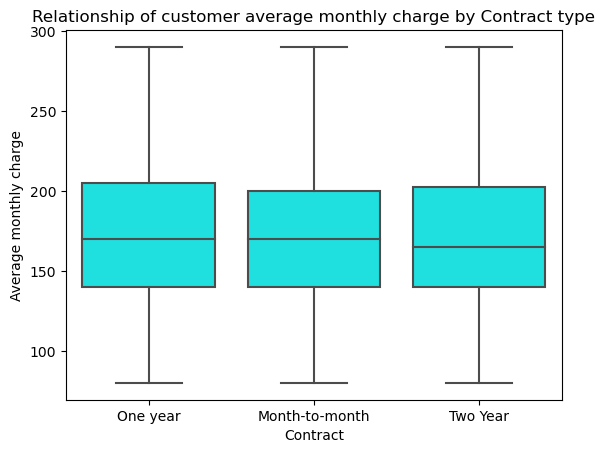

In [190]:
#Visual bivariate exploration of MonthlyCharge variable by each Contract variable
plt.title("Relationship of customer average monthly charge by Contract type")
sns.boxplot(data=cd, x= "Contract", y = "MonthlyCharge", color= "cyan")
plt.xlabel("Contract")
plt.ylabel("Average monthly charge");

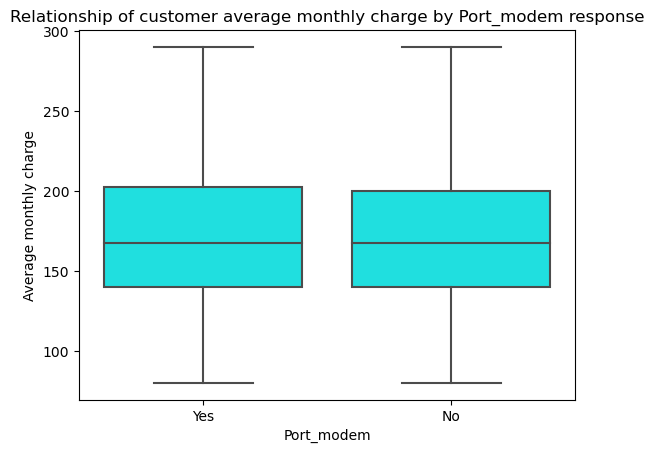

In [191]:
#Visual bivariate exploration of MonthlyCharge variable by each Port_modem variable
plt.title("Relationship of customer average monthly charge by Port_modem response")
sns.boxplot(data=cd, x= "Port_modem", y = "MonthlyCharge", color= "cyan")
plt.xlabel("Port_modem")
plt.ylabel("Average monthly charge");

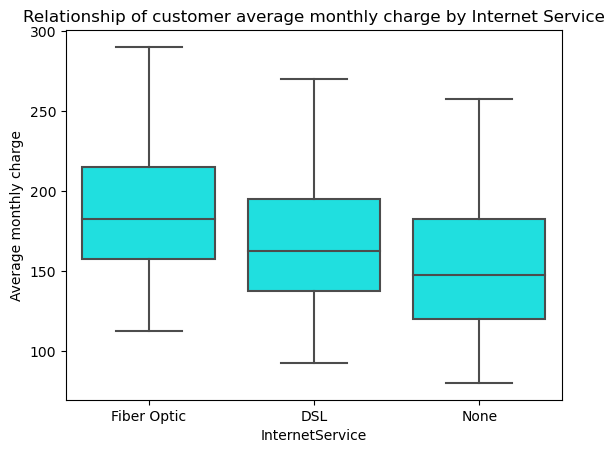

In [192]:
#Visual bivariate exploration of MonthlyCharge variable by each InternetService variable
plt.title("Relationship of customer average monthly charge by Internet Service")
sns.boxplot(data=cd, x= "InternetService", y = "MonthlyCharge", color= "cyan")
plt.xlabel("InternetService")
plt.ylabel("Average monthly charge");

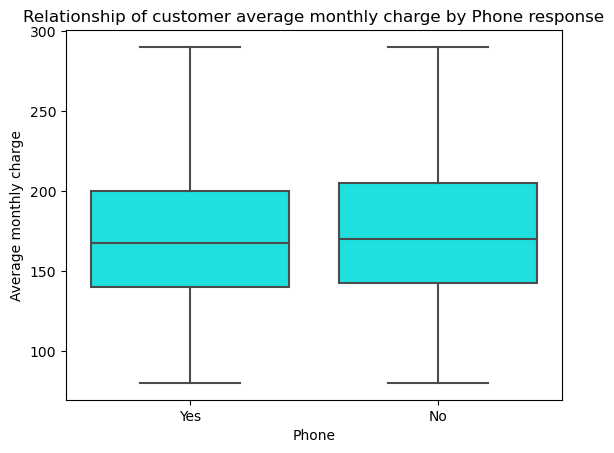

In [193]:
#Visual bivariate exploration of MonthlyCharge variable by each Phone variable
plt.title("Relationship of customer average monthly charge by Phone response")
sns.boxplot(data=cd, x= "Phone", y = "MonthlyCharge", color= "cyan")
plt.xlabel("Phone")
plt.ylabel("Average monthly charge");

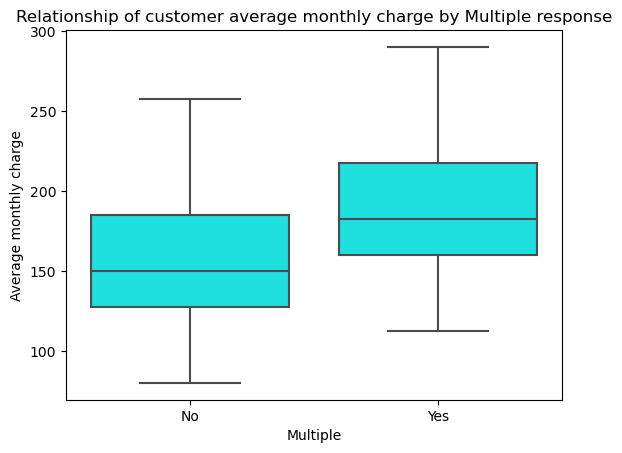

In [194]:
#Visual bivariate exploration of MonthlyCharge variable by each Multiple variable
plt.title("Relationship of customer average monthly charge by Multiple response")
sns.boxplot(data=cd, x= "Multiple", y = "MonthlyCharge", color= "cyan")
plt.xlabel("Multiple")
plt.ylabel("Average monthly charge");

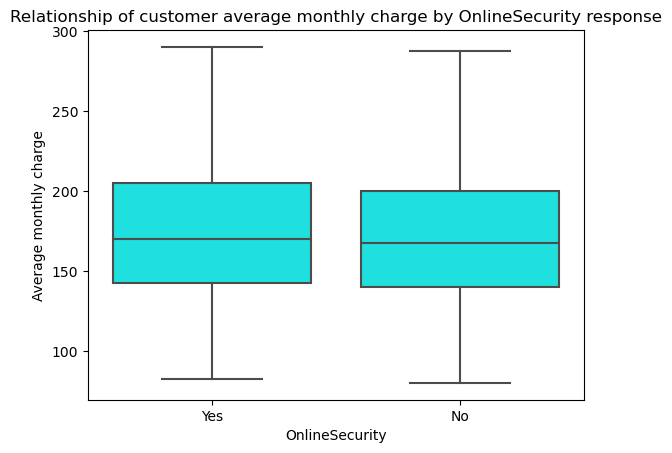

In [195]:
#Visual bivariate exploration of MonthlyCharge variable by each OnlineSecurity variable
plt.title("Relationship of customer average monthly charge by OnlineSecurity response")
sns.boxplot(data=cd, x= "OnlineSecurity", y = "MonthlyCharge", color= "cyan")
plt.xlabel("OnlineSecurity")
plt.ylabel("Average monthly charge");

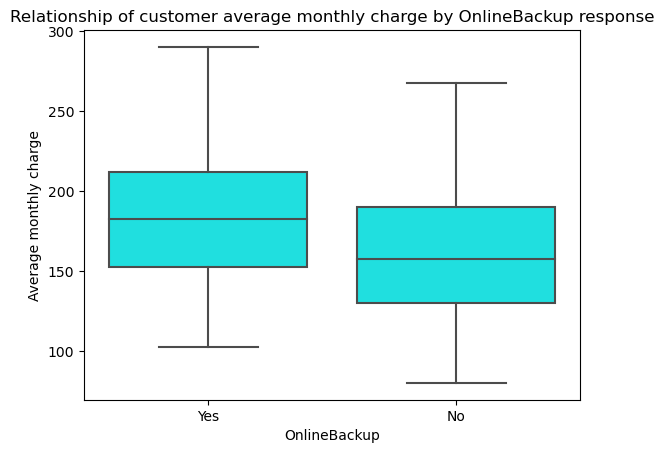

In [196]:
#Visual bivariate exploration of MonthlyCharge variable by each OnlineBackup variable
plt.title("Relationship of customer average monthly charge by OnlineBackup response")
sns.boxplot(data=cd, x= "OnlineBackup", y = "MonthlyCharge", color= "cyan")
plt.xlabel("OnlineBackup")
plt.ylabel("Average monthly charge");

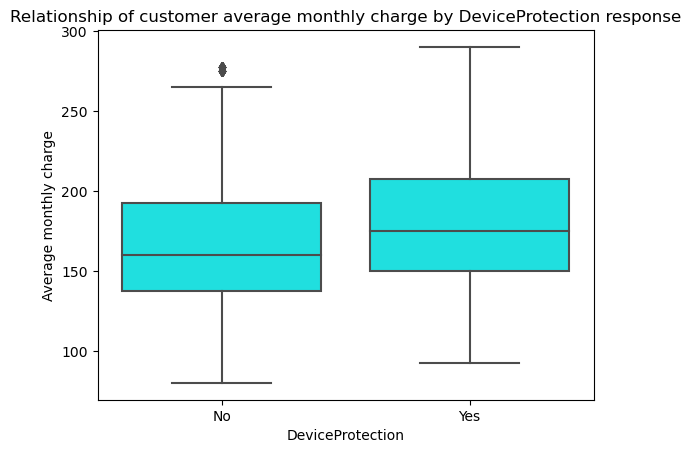

In [197]:
#Visual bivariate exploration of MonthlyCharge variable by each DeviceProtection variable
plt.title("Relationship of customer average monthly charge by DeviceProtection response")
sns.boxplot(data=cd, x= "DeviceProtection", y = "MonthlyCharge", color= "cyan")
plt.xlabel("DeviceProtection")
plt.ylabel("Average monthly charge");

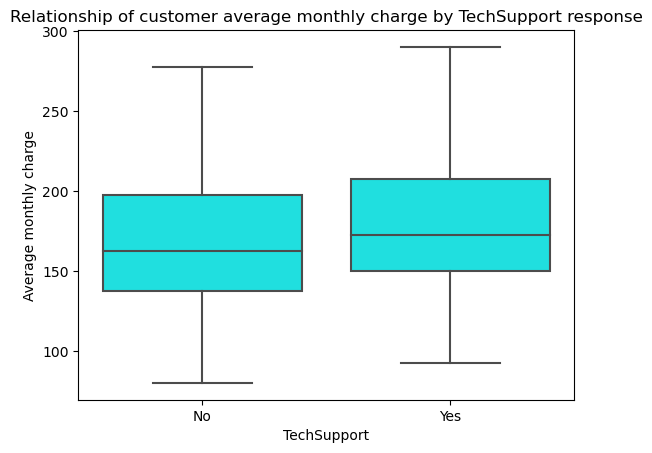

In [198]:
#Visual bivariate exploration of MonthlyCharge variable by each TechSupport variable
plt.title("Relationship of customer average monthly charge by TechSupport response")
sns.boxplot(data=cd, x= "TechSupport", y = "MonthlyCharge", color= "cyan")
plt.xlabel("TechSupport")
plt.ylabel("Average monthly charge");

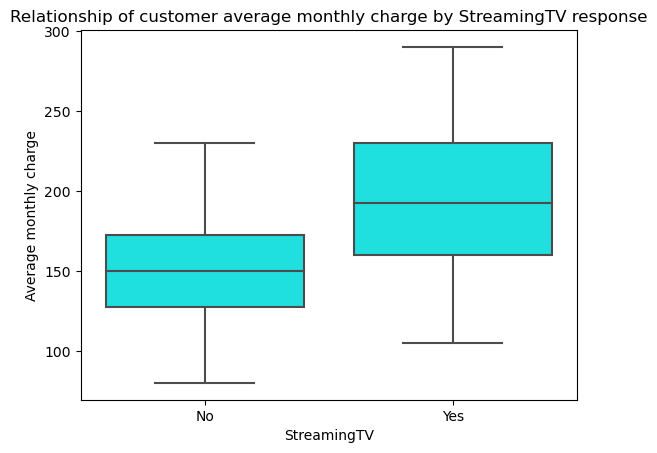

In [199]:
#Visual bivariate exploration of MonthlyCharge variable by each StreamingTV variable
plt.title("Relationship of customer average monthly charge by StreamingTV response")
sns.boxplot(data=cd, x= "StreamingTV", y = "MonthlyCharge", color= "cyan")
plt.xlabel("StreamingTV")
plt.ylabel("Average monthly charge");

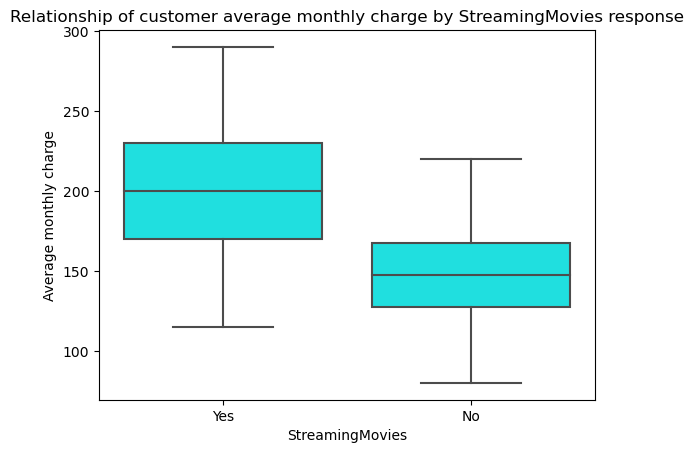

In [200]:
#Visual bivariate exploration of MonthlyCharge variable by each StreamingMovies variable
plt.title("Relationship of customer average monthly charge by StreamingMovies response")
sns.boxplot(data=cd, x= "StreamingMovies", y = "MonthlyCharge", color= "cyan")
plt.xlabel("StreamingMovies")
plt.ylabel("Average monthly charge");

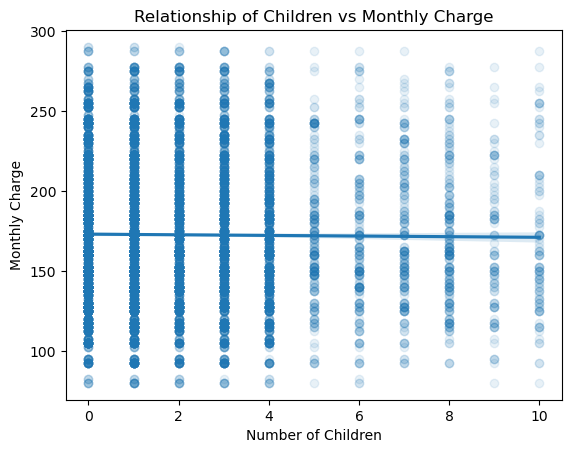

In [201]:
#Visual bivariate exploration of MonthlyCharge variable by Children variable
plt.title("Relationship of Children vs Monthly Charge")
sns.regplot(data=cd, x="Children", y="MonthlyCharge", scatter_kws={'alpha' : 1/10})
plt.xlabel("Number of Children")
plt.ylabel("Monthly Charge");

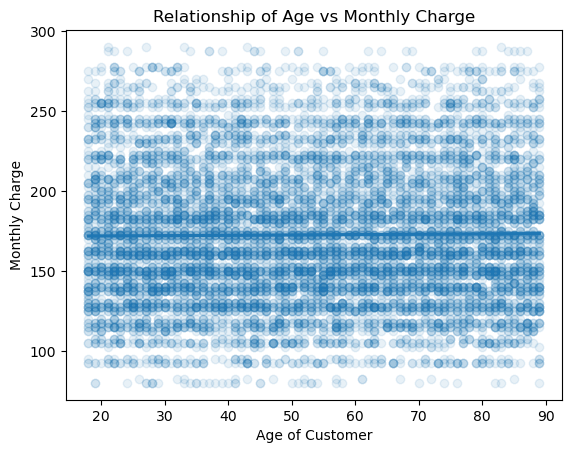

In [202]:
#Visual bivariate exploration of MonthlyCharge variable by Age variable
plt.title("Relationship of Age vs Monthly Charge")
sns.regplot(data=cd, x="Age", y="MonthlyCharge", scatter_kws={'alpha' : 1/10})
plt.xlabel("Age of Customer")
plt.ylabel("Monthly Charge");

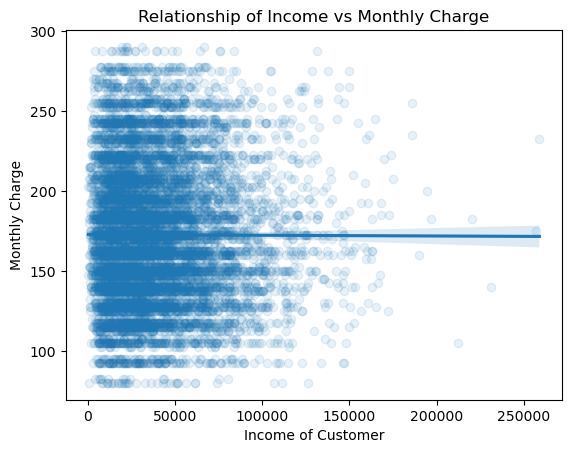

In [203]:
#Visual bivariate exploration of MonthlyCharge variable by Income variable
plt.title("Relationship of Income vs Monthly Charge")
sns.regplot(data=cd, x="Income", y="MonthlyCharge", scatter_kws={'alpha' : 1/10})
plt.xlabel("Income of Customer")
plt.ylabel("Monthly Charge");

In [204]:
pd.set_option('display.max_columns', None)
print(cd)

          Customer_id                           Interaction  \
CaseOrder                                                     
1             K409198  aa90260b-4141-4a24-8e36-b04ce1f4f77b   
2             S120509  fb76459f-c047-4a9d-8af9-e0f7d4ac2524   
3             K191035  344d114c-3736-4be5-98f7-c72c281e2d35   
4              D90850  abfa2b40-2d43-4994-b15a-989b8c79e311   
5             K662701  68a861fd-0d20-4e51-a587-8a90407ee574   
...               ...                                   ...   
9996          M324793  45deb5a2-ae04-4518-bf0b-c82db8dbe4a4   
9997          D861732  6e96b921-0c09-4993-bbda-a1ac6411061a   
9998          I243405  e8307ddf-9a01-4fff-bc59-4742e03fd24f   
9999          I641617  3775ccfc-0052-4107-81ae-9657f81ecdf3   
10000          T38070  9de5fb6e-bd33-4995-aec8-f01d0172a499   

                                        UID          City State  \
CaseOrder                                                         
1          e885b299883d4f9fb18e39c75155d990   

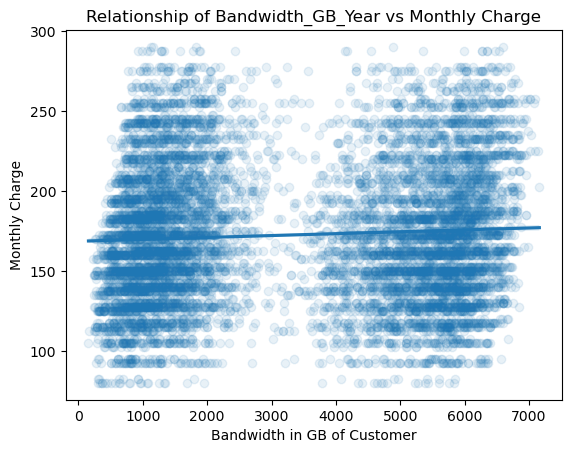

In [205]:
#Visual bivariate exploration of MonthlyCharge variable by Bandwidth_GB_Year variable
plt.title("Relationship of Bandwidth_GB_Year vs Monthly Charge")
sns.regplot(data=cd, x="Bandwidth_GB_Year", y="MonthlyCharge", scatter_kws={'alpha' : 1/10})
plt.xlabel("Bandwidth in GB of Customer")
plt.ylabel("Monthly Charge");

In [206]:
#Creating mapping to turn Yes to 1 and No to 0 for the variables that have yes or no responses
bool_map = {"Yes" : 1, "No" : 0}

In [207]:
# Converting columns with the mapping I created
cd["Techie"] = cd["Techie"].map(bool_map)
cd["Port_modem"] = cd["Port_modem"].map(bool_map)
cd["Phone"] = cd["Phone"].map(bool_map)
cd["Multiple"] = cd["Multiple"].map(bool_map)
cd["OnlineSecurity"] = cd["OnlineSecurity"].map(bool_map)
cd["OnlineBackup"] = cd["OnlineBackup"].map(bool_map)
cd["DeviceProtection"] = cd["DeviceProtection"].map(bool_map)
cd["TechSupport"] = cd["TechSupport"].map(bool_map)
cd["StreamingTV"] = cd["StreamingTV"].map(bool_map)
cd["StreamingMovies"] = cd["StreamingMovies"].map(bool_map)

In [208]:
#Making dummy values columns for Marital, Gender, Contract, and InternetService
Marital_dum = pd.get_dummies(data=cd["Marital"], drop_first=True)
Gender_dum = pd.get_dummies(data=cd["Gender"], drop_first=True)
Contract_dum = pd.get_dummies(data=cd["Contract"], drop_first=True)
InternetService_dum = pd.get_dummies(data=cd["InternetService"], drop_first=True)

In [209]:
# Create new dataset with only the wanted columns for the initial multiple linear regression
cd_mlr = cd[["Children", "Age", "Income", "Techie", "Port_modem", "Phone", "Multiple", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "Bandwidth_GB_Year", "MonthlyCharge" ]]

In [210]:
#Inserting the dummy variables in cd_mlr
cd_mlr.insert(1, "Marital_Widowed", Marital_dum.Widowed)
cd_mlr.insert(1, "Marital_Married", Marital_dum.Married)
cd_mlr.insert(1, "Marital_Separated", Marital_dum.Separated)
cd_mlr.insert(1, "Marital_Never_Married", Marital_dum['Never Married'])
cd_mlr.insert(1, "Gender_Male", Gender_dum.Male)
cd_mlr.insert(1, "Gender_Nonbinary", Gender_dum.Nonbinary)
cd_mlr.insert(1, "Contract_One_year", Contract_dum['One year'])
cd_mlr.insert(1, "Contract_Two_year", Contract_dum['Two Year'])
cd_mlr.insert(1, "InternetService_None", InternetService_dum['None'])
cd_mlr.insert(1, "InternetService_Fiber_Optic", InternetService_dum['Fiber Optic'])

In [211]:
cd_mlr

,Children,InternetService_Fiber_Optic,InternetService_None,Contract_Two_year,Contract_One_year,Gender_Nonbinary,Gender_Male,Marital_Never_Married,Marital_Separated,Marital_Married,Marital_Widowed,Age,Income,Techie,Port_modem,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Bandwidth_GB_Year,MonthlyCharge
CaseOrder,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,1,0,0,1,0,1,0,0,0,1,68,28561.99,0,1,1,0,1,1,0,0,0,1,904.536110,172.455519
2,1,1,0,0,0,0,0,0,0,1,0,27,21704.77,1,0,1,1,1,0,0,0,1,1,800.982766,242.632554
3,4,0,0,1,0,0,0,0,0,0,1,50,9609.57,1,1,1,1,0,0,0,0,0,1,2054.706961,159.947583
4,1,0,0,1,0,0,1,0,0,1,0,48,18925.23,1,0,1,0,1,0,0,0,1,0,2164.579412,119.956840
5,0,1,0,0,0,0,1,0,1,0,0,83,40074.19,0,1,0,0,0,0,0,1,1,0,271.493436,149.948316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,3,0,0,0,0,0,1,0,0,1,0,23,55723.74,0,1,1,1,0,1,1,0,0,0,6511.252601,159.979400
9997,4,1,0,1,0,0,1,0,0,0,0,48,34129.34,0,0,1,1,1,1,1,0,1,0,5695.951810,207.481100
9998,1,1,0,0,0,0,0,1,0,0,0,48,45983.43,0,0,1,1,1,1,0,0,0,0,4159.305799,169.974100


In [212]:
# Initial model for Multiple Linear Regression

#Making y my dependent variable
y = cd_mlr.MonthlyCharge
#Making X multiple independent variables
X = cd_mlr[["Children","InternetService_Fiber_Optic","InternetService_None","Contract_Two_year","Contract_One_year","Gender_Nonbinary","Gender_Male","Marital_Never_Married","Marital_Separated","Marital_Married","Marital_Widowed","Age","Income","Techie","Port_modem","Phone","Multiple","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","Bandwidth_GB_Year"
]].assign(const=1)

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          MonthlyCharge   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     9519.
Date:                Fri, 15 Dec 2023   Prob (F-statistic):               0.00
Time:                        10:09:05   Log-Likelihood:                -35918.
No. Observations:               10000   AIC:                         7.189e+04
Df Residuals:                    9975   BIC:                         7.207e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Children          

In [213]:
results.resid.std(ddof=X.shape[1])

8.79420895844156

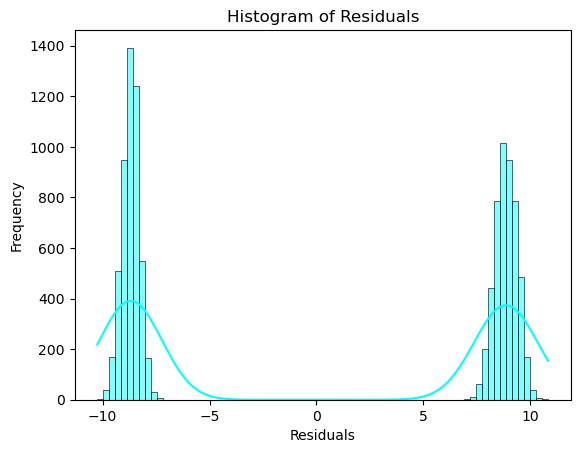

                            OLS Regression Results                            
Dep. Variable:          MonthlyCharge   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     9519.
Date:                Fri, 15 Dec 2023   Prob (F-statistic):               0.00
Time:                        16:02:31   Log-Likelihood:                -35918.
No. Observations:               10000   AIC:                         7.189e+04
Df Residuals:                    9975   BIC:                         7.207e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Children          

In [223]:
# Get the residuals
residuals = results.resid

# Histogram of residuals

sns.histplot(residuals, bins=75, kde=True, color='cyan')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Print summary statistics
print(results.summary())

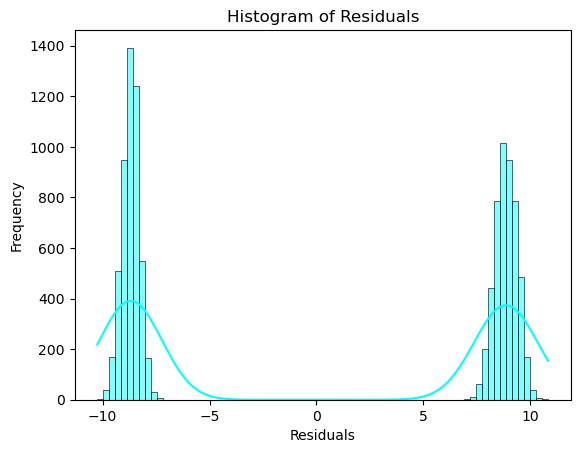

In [225]:
# Get the residuals
residuals = results.resid

# Histogram of residuals

sns.histplot(residuals, bins=75, kde=True, color='cyan')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency');